# Churn_Telecom_P3_Project

Student name: Hera K.

Student pace: full time

Scheduled project review date/time: 04/17/2023

Instructor name: Daniel Burdeno

Blog post URL:

# Overview

For this project I will be using some machine learning algorithm such as SMOTE, pipeline, random forest techniques to analyze the features used in determinig churn of Syria company

# Business Problem

I am hired by a Syria company to predict customer churn and how to avoid churn furthermore promote customer retaining.

# Data Understanding

I used Syria’s telecom company data from Kaggle dataset. The utilizations provided by company has been used as data for this analysis such as day/evening/night calls, minutes and charges, international calls, minutes and charges, voicemail messages and customer service calls.

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Read data as pandas dataframe from csv file

telcom = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
telcom

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
# Checks the first 5 rows
telcom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# telcom.shape (3333, 21)

In [5]:
# Statistical descriptive analysis

telcom.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


We should check : 

> The missing (null data), 

> Duplicated columns 

> Eliminate the irrelavant columns 

In [6]:
# Checks the missing info( null data), class, datatypes regarding all columns
# There is no missing info 

telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Check the duplicated rows
# There is no duplicated rows 

telcom.duplicated().sum()

0

In [8]:
# Check how many nulls we have in our original column

telcom.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Check any columns that will be dropped and that will not be needed for analysis 

telcom = telcom.drop(columns=['phone number'], axis=1, inplace=False)
telcom.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
telcom.shape

(3333, 20)

In [11]:
# Check the number of unique values for all columns to determine feature type

telcom.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:
# not contionuos, you can treat as categorically

telcom['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

INTERPRETATION AREA CODE:

    According to the frequent distribution of area code:
* The half of customers area code is 415 according to distribution of area code
* The quarter of customers' area code 510, the other quarter of customers' area code is 408

False    2850
True      483
Name: churn, dtype: int64


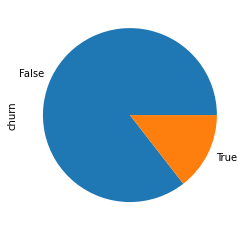

In [13]:
# Visualize pie chart

print(telcom.churn.value_counts())

telcom['churn'].value_counts().plot(kind='pie');

 INTERPRETATION PIE CHART:
 * churn: true if the customer terminated their contract, otherwise false.
 * There are 483 fraud transactions, that means 483 of 3333 customer break off relations with Syria Tel company. That means approx 15 % of customers lost. 
 * The pie chart displays imbalance of churn data distribution, this situation can cause false prediction, before modelling it should be balanced.

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='Count'>

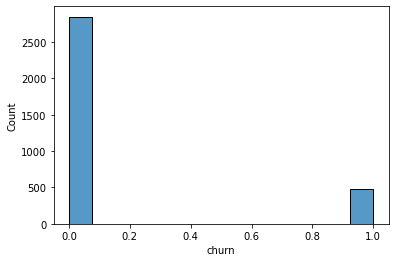

In [14]:
# Visualize bar chart
# We can see the same imbalance as mentioned above as bar chart

print(telcom.churn.value_counts())
sns.histplot(telcom['churn'])

# Correlation Map &  The most Correlated Data 

In [15]:
# All columns name of DataFrame

telcom.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [16]:
# float and integer columns

flt_int = telcom.select_dtypes('float', 'int')
flt_int

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...
3328,156.2,26.55,215.5,18.32,279.1,12.56,9.9,2.67
3329,231.1,39.29,153.4,13.04,191.3,8.61,9.6,2.59
3330,180.8,30.74,288.8,24.55,191.9,8.64,14.1,3.81
3331,213.8,36.35,159.6,13.57,139.2,6.26,5.0,1.35


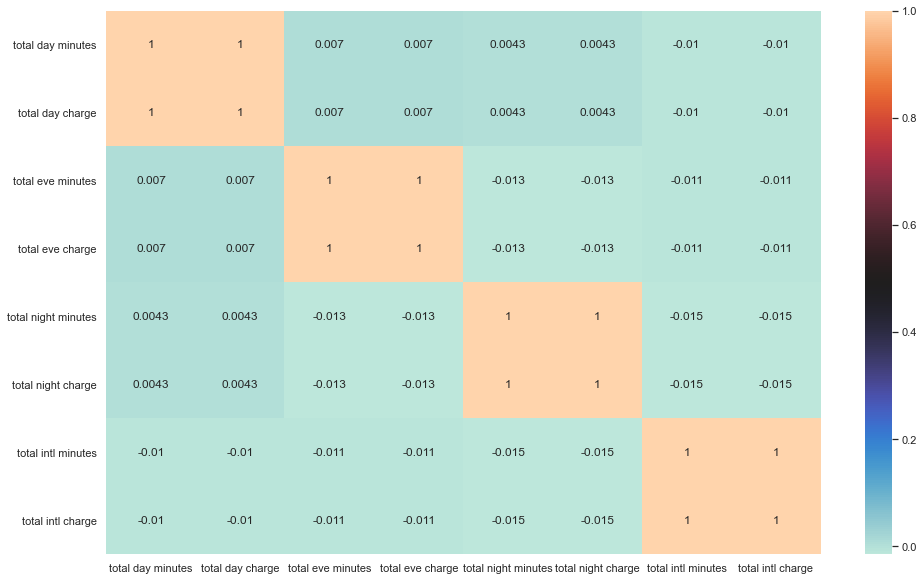

In [17]:
# Correlation heatmap for float, int

sns.set(rc={'figure.figsize':(16, 10)})
sns.set_palette("bright")
sns.heatmap(flt_int.corr(), annot=True, cmap='icefire');

NTERPRETATION THE HEATMAP : 

 > Checked numeric columns' correlation among themselves

   * Total intl minutes re full positive correlated total intl charge 
   * Total night minutes are full positive correlated total night charge
   * Total evening minutes are full positive correlated total evening charges
   * Total day minutes are full positive correlated total day minutes
    

In [18]:
# Created numeric columns 

num_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
           'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

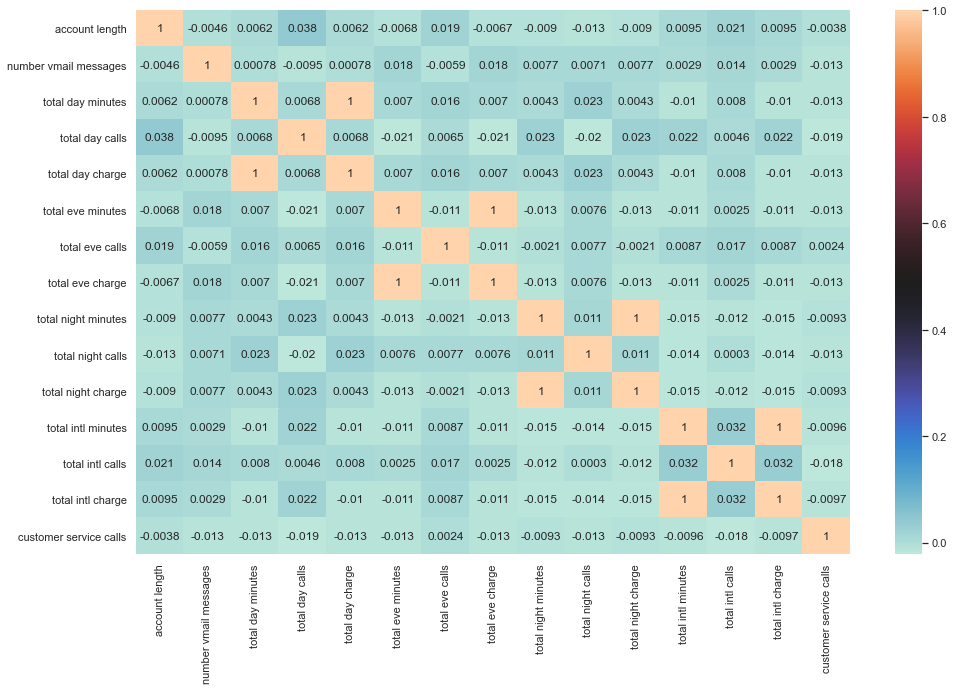

In [19]:
# Correlation heatmap for Numeric Features

sns.set(rc={'figure.figsize':(16, 10)})
sns.heatmap(telcom[num_cols].corr(), annot=True, cmap='icefire');

In [20]:
# The correlation (sorted, descending, absolute ) all variables associated to the churn (target) 

telcom_corrs = telcom.corr()['churn'].map(abs).sort_values(ascending=False)
telcom_corrs

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64

INTERPRETATION CORR:
   * The correlation between churn ( y, target) and other independent variables. 
   * Customer call service calls are the most correlated with churn
   * Total night calls and area code are the least correlated with the churn. 

# Plotting the Predictor vs. Churn

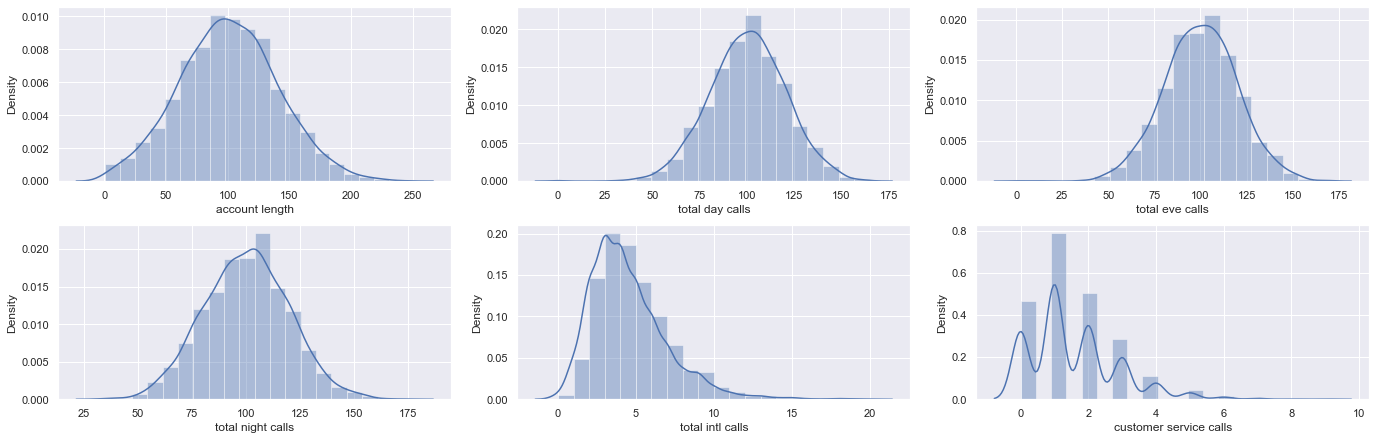

In [21]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(telcom["account length"],bins=20,ax=ax[0,0]);

sns.distplot(telcom["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(telcom["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(telcom["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(telcom["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(telcom["customer service calls"],bins=20,ax=ax[1,2]);

<AxesSubplot:xlabel='customer service calls', ylabel='Density'>

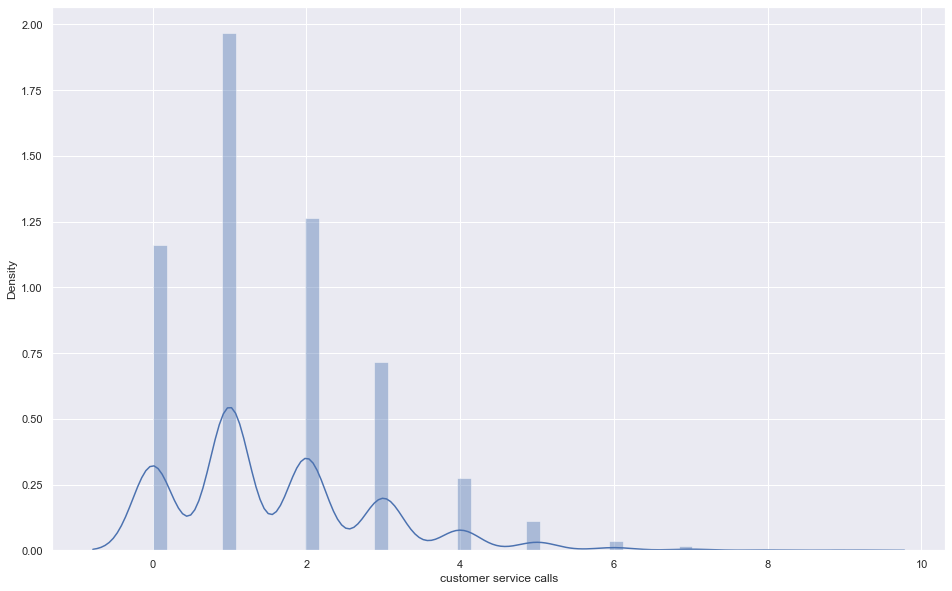

In [22]:
# Plot all data points, most_correlated vs. churn
# y = 'price'
# x = most_correlated 
# The most correlated X variable

most_correlated = 'customer service calls'

sns.distplot(telcom['customer service calls'])

INTERPRETATION PLOTS:

* The plots above show that generally normal distribution is available excluding customer service calls.
* Total international calls seems to be skewed to the right side however it is still normally distributed.
* Customer service calls has a few peaks, which indicates there are a few modes in the population. Customer service calls has to be an integer and not a float number.

# Create Numeric and Categorical Columns

In [23]:
# categorical columns = state, area code, international plan, voicemail plan
# numeric columns = number vmail messages, total day minutes, total day calls, total day charge, 
            #total eve minutes, total eve calls, total eve charge, total night minutes, total night calls,
            #total night charge, total intl minutes, total intl calls, total intl charge, customer service call


num_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
           'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

cat_cols = ['state', 'area code', 'international plan','voice mail plan']


# Split data into train and test sets

In [24]:
# Separate data into feature and target DataFrames

X = telcom.drop('churn', axis=1)
y = telcom['churn']

In [25]:
# Split data into train and test sets.  
# Split into 75:25 ratio 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [26]:
type(X_train) 

pandas.core.frame.DataFrame

In [27]:
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,NH,67,415,no,yes,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,ND,101,415,no,yes,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,FL,91,510,yes,yes,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,NH,142,408,yes,yes,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,WI,81,415,no,yes,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1


In [28]:

X_train_num = X_train[num_cols]
X_train_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,27,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1
3264,89,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0
1653,93,0,131.4,78,22.34,219.7,106,18.67,155.7,103,7.01,11.1,2,3.00,1
2607,91,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3


In [29]:
#  Dummy

X_train_cat = X_train[cat_cols]
X_train_cat

,state,area code,international plan,voice mail plan
427,NH,415,no,yes
1656,ND,415,no,yes
1042,FL,510,yes,yes
1867,NH,408,yes,yes
346,WI,415,no,yes
...,...,...,...,...
835,GA,510,no,no
3264,RI,415,no,yes
1653,MD,510,yes,no
2607,IL,415,no,no


In [30]:

X_test_num = X_test[num_cols]
X_test_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
405,92,0,264.3,91,44.93,160.9,115,13.68,198.6,73,8.94,9.3,5,2.51,0
118,112,36,113.7,117,19.33,157.5,82,13.39,177.6,118,7.99,10.0,3,2.70,2
710,69,0,195.3,70,33.20,216.7,108,18.42,259.9,119,11.70,12.5,4,3.38,3
499,95,0,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03,1
2594,115,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,57,30,179.2,105,30.46,283.2,83,24.07,228.1,77,10.26,14.7,5,3.97,1
3027,101,28,220.3,96,37.45,285.8,72,24.29,203.0,111,9.14,9.4,6,2.54,4
1366,89,0,89.5,66,15.22,179.3,104,15.24,225.1,116,10.13,12.3,1,3.32,3
457,54,0,159.8,99,27.17,264.0,64,22.44,115.7,70,5.21,9.7,7,2.62,2


In [31]:

X_test_cat = X_test[cat_cols]
X_test_cat

,state,area code,international plan,voice mail plan
405,WI,415,yes,no
118,MO,510,no,yes
710,TN,510,no,no
499,WV,415,no,no
2594,OH,510,yes,no
...,...,...,...,...
3254,IL,415,no,yes
3027,WV,415,no,yes
1366,NY,415,no,no
457,KY,408,no,no


### NOTE : 
This is not linearity, it is non linear. So rainforest and pipeline is the best way to make robust model and it trains automatically and it is robust for outliers 

# One Hot Encoder  &   Concatenate the columns  & Dummies

In [32]:
# Taking in other features (category)
# One hot encoding is a technique that we use to represent categorical variables as numerical values

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train_cat)

# Getting a DF
dummies_df = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(),
                         index=X_train_cat.index)

# What we'll feed int our model
X_train_all = pd.concat([X_train_num, dummies_df ], axis=1)
X_train_all.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_415,x1_510,x2_yes,x3_yes
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
print(X_train_all.duplicated().sum())
print(X_train_all.shape)

0
(2499, 69)


In [34]:
# Note the same transformation (not FIT) to match structure

test_dummies = ohe.transform(X_test_cat)
test_df = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names(),
                       index=X_test_cat.index)
X_test_all = pd.concat([X_test_num, test_df], axis=1)
X_test_all.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_415,x1_510,x2_yes,x3_yes
405,92,0,264.3,91,44.93,160.9,115,13.68,198.6,73,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
118,112,36,113.7,117,19.33,157.5,82,13.39,177.6,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
710,69,0,195.3,70,33.20,216.7,108,18.42,259.9,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
499,95,0,175.2,91,29.78,244.4,109,20.77,75.8,95,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2594,115,0,345.3,81,58.70,203.4,106,17.29,217.5,107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [35]:
X_test_all.shape

(834, 69)

# Classification with Pipelines

In [36]:
list(X.columns[(X.dtypes.values == int) | (X.dtypes.values == float)])

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [37]:
# We'll throw these mini-pipelines into our ColumnTransformer.

subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [38]:
num_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
           'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

cat_cols = ['state', 'area code', 'international plan','voice mail plan']


In [39]:
# The "remainder='passthrough'" bit tells the compiler to leave
# the other df columns unchanged.

CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, num_cols),
                                         ('subpipe_cat', subpipe_cat, cat_cols)],
                           remainder='passthrough')

In [40]:
# The `ColumnTransformer` will take care of our preprocessing,
# so now we can add our model at the end of the pipeline.

logreg_model_pipe = Pipeline(steps=[('ct', CT),
                            ('logreg', LogisticRegression(random_state=42))])

In [41]:
logreg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                         

In [42]:
logreg_model_pipe.score(X_train, y_train)

0.8711484593837535

In [43]:
cross_val_score(logreg_model_pipe, X_train, y_train).mean()

0.8571382765531063

In [44]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [45]:
log_pipe = ModelWithCV(logreg_model_pipe, model_name='log_pipe', X=X_train, y=y_train)

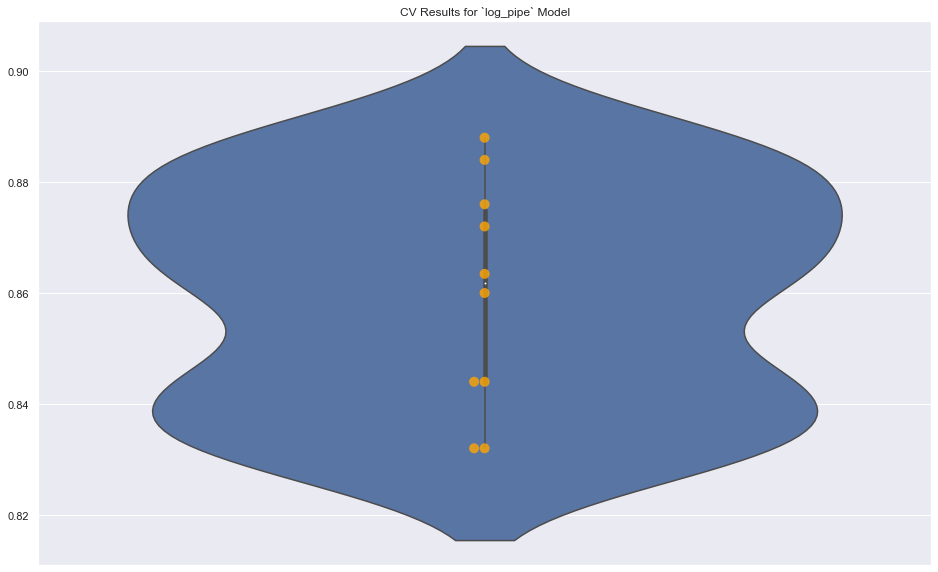

In [46]:
fig, ax = plt.subplots()

log_pipe.plot_cv(ax=ax);

In [47]:
log_pipe.print_cv_summary()

CV Results for `log_pipe` model:
            0.85955 ± 0.01962 accuracy
        


# Random Forest Model

In [48]:
rfc = RandomForestClassifier(random_state=42)

rfc_model_pipe = Pipeline([('ct', CT), ('rfc', rfc)])

In [49]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                         

In [50]:
rfc_model_pipe.score(X_train, y_train)

1.0

In [51]:
forest_pipe = ModelWithCV(model=rfc_model_pipe,
                          model_name='forest_pipe',
                          X=X_train,                          y=y_train)

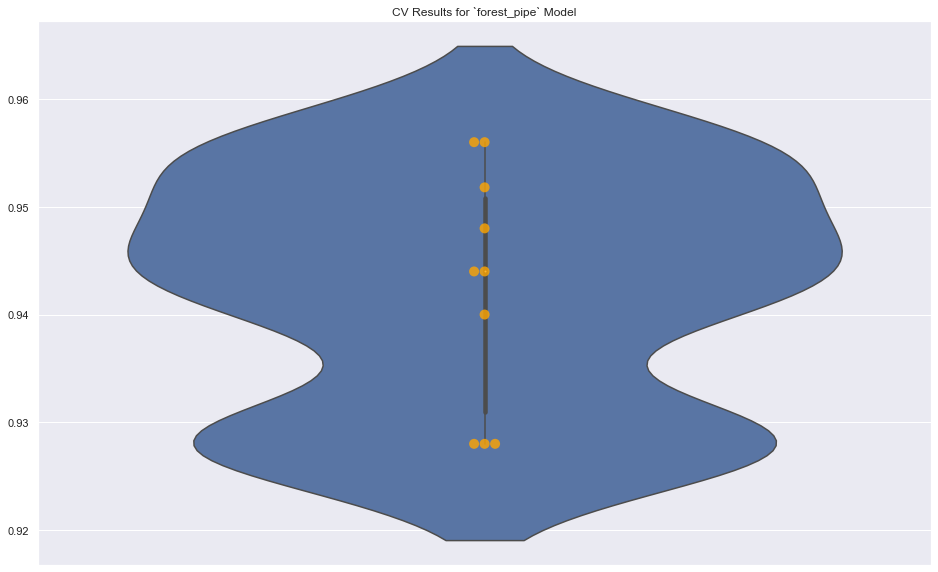

In [52]:
# make this without class
fig, ax = plt.subplots()

forest_pipe.plot_cv(ax=ax);

In [53]:
forest_pipe.print_cv_summary()

CV Results for `forest_pipe` model:
            0.94238 ± 0.01060 accuracy
        


# Train- Test Split

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# SMOTE Technique - Eliminate imbalance for Churn

In [61]:
y_train.value_counts(normalize=True)

False    0.855542
True     0.144458
Name: churn, dtype: float64

In [62]:
sm = SMOTE(sampling_strategy=.75, random_state=0)
X_train_over, y_train_over = sm.fit_resample(X_train_all, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train_all.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2499, 69)
Before OverSampling, the shape of y_train: (2499,)
After OverSampling, the shape of X_train_over: (3741, 69)
After OverSampling, the shape of y_train_over: (3741,)


In [66]:
# Get the numeric data types and eliminate the NaNs from X_train

X_train_clean = X_train.select_dtypes(['float', 'int']).dropna()
y_train_clean = y_train[X_train_clean.index]

In [67]:
# Balanced y target( churn)

y_train_over.value_counts()

False    2138
True     1603
Name: churn, dtype: int64

In [68]:
# Even distribution

X_clean_resmp, y_clean_resmp = sm.fit_resample(X_train_clean, y_train_clean)

y_clean_resmp.value_counts()

False    2138
True     1603
Name: churn, dtype: int64

In [69]:
1598/2131

0.7498826841858283

# SMOTE with pipeline

In [70]:
imb_pipe = ImPipeline(steps=[('ct', CT),
                             ('sm', SMOTE(random_state=42)),
                            ('rfc', RandomForestClassifier(random_state=42))])

In [71]:
imb_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                         

In [72]:
imb_pipe.score(X_train, y_train)

1.0

In [73]:
cross_val_score(imb_pipe, X_train, y_train).mean()

0.9291687374749499

### Gridsearching

In [75]:
parameters = {'rfc__criterion': ['gini', 'entropy'],
          'rfc__min_samples_leaf': [1, 5, 10],
          'sm__k_neighbors': [3, 5, 9]}

gs = GridSearchCV(estimator=imb_pipe,
                 param_grid=parameters,
                 cv=10, verbose=3, n_jobs=-3)

In [76]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   13.5s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('num_impute',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
        

In [77]:
gs.best_params_

{'rfc__criterion': 'entropy', 'rfc__min_samples_leaf': 1, 'sm__k_neighbors': 3}

In [78]:
gs.best_score_

0.9403775100401607

In [79]:
cross_val_score(gs, X_train, y_train).mean()

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   10.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   10.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   10.1s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   10.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:   10.0s finished


0.9379751503006013

## Evaluation on Test Set

In [80]:
RandomForestClassifier()

RandomForestClassifier()

In [81]:
SMOTE()

SMOTE()

In [82]:
imb_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                         

In [83]:
final_model = gs.best_estimator_

In [84]:
final_model

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                         

In [96]:
y_hat= final_model.predict(X_test)
y_hat

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,

In [97]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 2)}.
""")


Our final model's accuracy on the test set is 0.94. 

Our final model's recall on the test set is 0.71 

Our final model's precision on the test set is 0.88 

Our final model's f1-score on the test is 0.79.



In [98]:
cross_val_score(final_model, X_train, y_train).mean()

0.9367751503006012

In [99]:
cross_val_score(final_model, X_test, y_test).mean()

0.905302647716615

In [108]:
print(f"""
Our logreg_model_pipe cross validation on the train set is {(cross_val_score(logreg_model_pipe, X_train, y_train).mean())}. \n
Our log_pipe cross validation on the train set is {(log_pipe.print_cv_summary())}. \n
Our forest_pipe model cross validation on the train set is {(forest_pipe.print_cv_summary())} \n
Our imb_pipe model cross validation on the train set is {(cross_val_score(imb_pipe, X_train, y_train).mean())} \n
Our gs model cross validation on the train set is {(cross_val_score(gs, X_train, y_train).mean())} \n
Our final model's cross validation on the train set is {(cross_val_score(final_model, X_train, y_train).mean())}.
""")

CV Results for `log_pipe` model:
            0.85955 ± 0.01962 accuracy
        
CV Results for `forest_pipe` model:
            0.94238 ± 0.01060 accuracy
        
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    9.6s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    9.4s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    9.4s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    9.2s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-3)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-3)]: Done 112 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    9.3s finished



Our logreg_model_pipe cross validation on the train set is 0.8675486973947896. 

Our log_pipe cross validation on the train set is None. 

Our forest_pipe model cross validation on the train set is None 

Our imb_pipe model cross validation on the train set is 0.9291687374749499 

Our gs model cross validation on the train set is 0.9379751503006013 

Our final model's cross validation on the train set is 0.9367751503006012.



INTERPRETATION MODEL'S CROSS CALIDATION / SCORE : 

Whereas forest_pipe, gs and final cross score is pretty much close each of other, forest_pipe model's cross validation score is slightly higher than all of them.

Forest_pipe has been preferred as a result model.
